In [79]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# creating dataframe
df = pd.read_csv('./resources/Books.csv')
df.head()

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,2.330,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,1.787,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,0.216,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,3.538,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,2.330,https://www.goodreads.com/book/show/170448.Ani...


In [81]:
# samplinig 100 random rows from the dataframe
df_sampled = df.sample(n=100)
print(len(df_sampled.index))
df_sampled.head()

100


,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
563,563,Grendel,John Gardner,32739,2097,3.69,174.0,1971.0,0,"['Fiction', 'Fantasy', 'Classics']",1.0,4.141,-1.233,https://www.goodreads.com/book/show/32234.Whit...
143,143,A Streetcar Named Desire,Tennessee Williams,264369,4186,3.98,107.0,1947.0,0,"['Plays', 'Classics', 'Drama']",2.0,5.893,0.518,https://www.goodreads.com/book/show/12067.Good...
379,379,I Capture the Castle,Dodie Smith,86146,8653,4.00,408.0,1948.0,0,"['Classics', 'Fiction', 'Young Adult']",NaN,6.013,0.639,https://www.goodreads.com/book/show/31122.I_Ca...
524,524,The Lover,Marguerite Duras,37329,2743,3.74,117.0,1984.0,1,"['Fiction', 'Cultural', 'France']",4.0,4.443,-0.931,https://www.goodreads.com/book/show/275.The_Lover
871,871,Trout Fishing in America / The Pill vs. the Sp...,Richard Brautigan,9209,420,4.15,400.0,1967.0,0,"['Fiction', 'Poetry', 'Short Stories']",NaN,6.919,1.545,https://www.goodreads.com/book/show/12568.Trou...


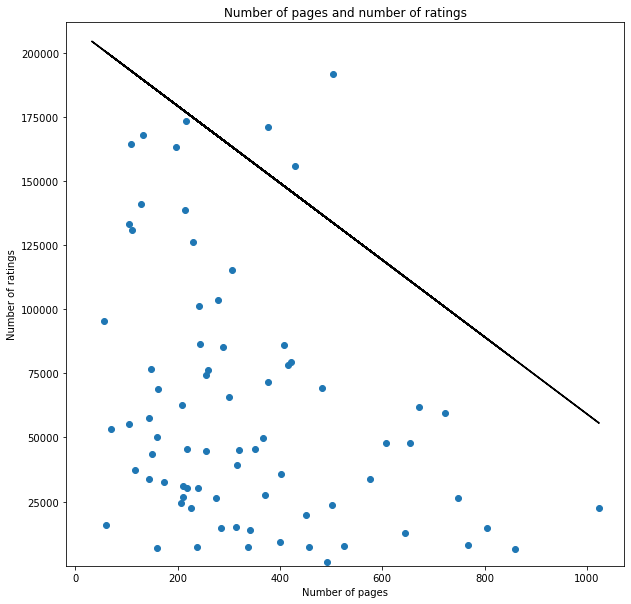

In [106]:
# creating scatter plot of pages and number of ratings
plt.figure(figsize=(10,10))
slope, intercept = np.polyfit(df_sampled['N pag'], df_sampled['Rating Count'], 1)
plt.plot(df_sampled['N pag'], slope * df_sampled['N pag'] + intercept, color='black') # code for the regression line
plt.ylim(2)
plt.scatter(df_sampled['N pag'], df_sampled['Rating Count'])
plt.xlabel('Number of pages')
plt.ylabel('Number of ratings')
plt.title('Number of pages and number of ratings')
# exporting plot
plt.savefig('pages_ratings.jpg')

In [88]:
# calculating correlation coefficient for number of pages and number of ratings

correlation_coefficient = df['N pag'].corr(df['Rating Count'])
print(correlation_coefficient)

-0.04393430173839197


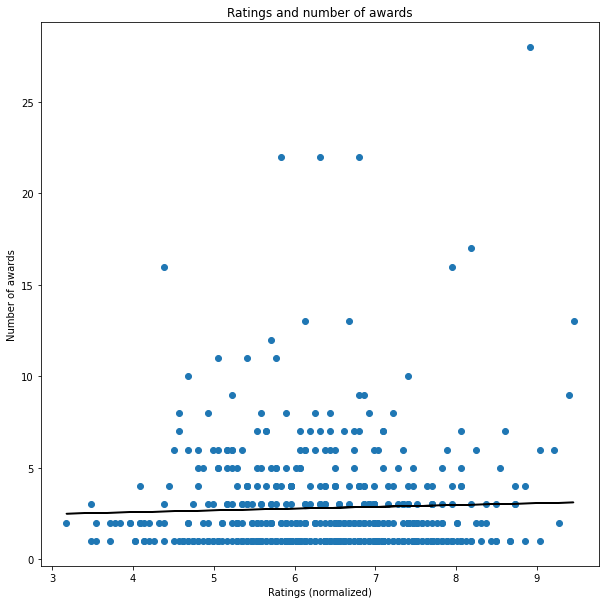

In [107]:
# plotting normalized ratings and number of awards

df_dropped = df[['minmax_norm_ratings', 'Awards']]
df_droppped = df_dropped.dropna(inplace=True)
plt.figure(figsize=(10,10))
slope, intercept = np.polyfit(df_dropped['minmax_norm_ratings'], df_dropped['Awards'], 1)
plt.plot(df_dropped['minmax_norm_ratings'], slope*df_dropped['minmax_norm_ratings'] + intercept, color='black')
plt.scatter(df_dropped['minmax_norm_ratings'], df_dropped['Awards'])
plt.xlabel('Ratings (normalized)')
plt.ylabel('Number of awards')
plt.title('Ratings and number of awards')
plt.savefig('ratings_awards.jpg')

In [101]:
# calculating correlation coefficient for ratings and number of awards

correlation_coefficient = df['minmax_norm_ratings'].corr(df['Awards'])

print(correlation_coefficient)

0.03739990845644539
